In [2]:
import numpy as np
import pandas as pd
import math
import re
import os
import copy
import matplotlib.pyplot as plt

# Preparing Data Set

In [3]:
##Step 1: Converting from sequence of 20 aminon acid to 140 features
excel_file_path = r"C:\Users\tiend\Downloads\SFA\Junior\Spring 2025\AI\AI project\1500 instances with points and sequences.xlsx"
new_table = pd.read_excel(excel_file_path)
#Append to another table with 20 columns representing 20  position
position_table = pd.DataFrame(columns=np.arange(1,21))
for index in new_table.index:
    position_table.loc[index,:] =list(new_table.loc[index,"Sequences"]) 
##Convert lsit of sequences into 2D array
array_2d = position_table.to_numpy()
##Convert each amino acid to AC vectors:
aa_properties = {
    'A': [0.62, -0.5, 27.5, 8.1, 0.046, 1.181, 0.007187],
    'C': [0.29, -1, 44.6, 5.5, 0.128, 1.461, -0.03661],
    'D': [-0.9, 3, 40, 13, 0.105, 1.587, -0.02382],
    'E': [-0.74, 3, 62, 12.3, 0.151, 1.862, 0.006802],
    'F': [1.19, -2.5, 115.5, 5.2, 0.29, 2.228, 0.037552],
    'G': [0.48, 0, 0, 9, 0, 0.881, 0.179052],
    'H': [-0.4, -0.5, 79, 10.4, 0.23, 2.025, -0.01069],
    'I': [1.38, -1.8, 93.5, 5.2, 0.186, 1.81, 0.021631],
    'K': [-1.5, 3, 100, 11.3, 0.219, 2.258, 0.017708],
    'L': [1.06, -1.8, 93.5, 4.9, 0.186, 1.931, 0.051672],
    'M': [0.64, -1.3, 94.1, 5.7, 0.221, 2.034, 0.002683],
    'N': [-0.78, 2, 58.7, 11.6, 0.134, 1.655, 0.005392],
    'P': [0.12, 0, 41.9, 8, 0.131, 1.468, 0.239531],
    'Q': [-0.85, 0.2, 80.7, 10.5, 0.18, 1.932, 0.049211],
    'R': [-2.53, 3, 105, 10.5, 0.291, 2.56, 0.043587],
    'S': [-0.18, 0.3, 29.3, 9.2, 0.062, 1.298, 0.004627],
    'T': [-0.05, -0.4, 51.3, 8.6, 0.108, 1.525, 0.003352],
    'V': [1.08, -1.5, 71.5, 5.9, 0.14, 1.645, 0.057004],
    'W': [0.81, -3.4, 145.5, 5.4, 0.409, 2.663, 0.037977],
    'Y': [0.26, -2.3, 117.3, 6.2, 0.298, 2.368, 0.023599]
}
array_2d

array([['D', 'A', 'H', ..., 'V', 'A', 'W'],
       ['E', 'W', 'F', ..., 'M', 'D', 'K'],
       ['K', 'V', 'H', ..., 'G', 'I', 'N'],
       ...,
       ['F', 'Y', 'Q', ..., 'A', 'L', 'A'],
       ['A', 'K', 'P', ..., 'W', 'G', 'D'],
       ['Q', 'P', 'F', ..., 'I', 'W', 'W']], dtype=object)

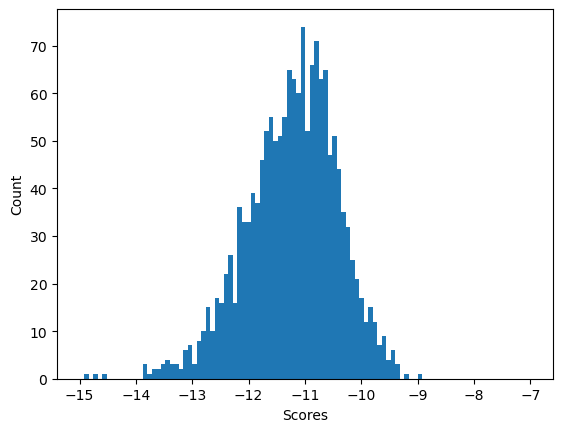

In [73]:
plt.xlim = (-15,7)
plt.hist(new_table["Score"],bins = 100,range=[-15,-7])
plt.xlabel("Scores")
plt.ylabel("Count")
plt.show()

In [5]:
def standardize(x):
    """Standardizes a NumPy array with column-wise

    Args:
    x: A NumPy array.

    Returns:
    A standardized NumPy array.
    """
    standardized_x = np.zeros(shape = (20,7))
    mean = np.mean(x,axis=0)
    std = np.std(x,axis=0)
    for column in range(7):
        for row in range(20):
            standardized_x[row,column] = (x[row,column] - mean[column])/std[column]
    return standardized_x

def normalize(x):
    """Standardizes a NumPy array with column-wise

    Args:
    x: A NumPy array.

    Returns:
    A standardized NumPy array.
    """
    normalized_x = np.zeros(shape = (20,7))
    ##Finding min
    min_x = np.min(x,axis=0)
    ##Finding max
    max_x_minus_min_x = np.max(x,axis=0)-min_x
    for column in range(7):
        for row in range(20):
            normalized_x[row,column] = (x[row,column] - min_x[column])/(max_x_minus_min_x[column])
    return normalized_x

In [6]:
""" Run this cell if standardize
values = standardize(np.array(list(aa_properties.values())))
keys = list(aa for aa in "ARNDCEQGHILKMFPSTWYV")
aa_properties_standardized = dict(zip(keys,values))
##Create a 3D array from 2D array containing sequences of a.a
list0 = []
for x in array_2d:
    list1 =[]
    for aa in x:
        list1.append(aa_properties_standardized[aa])
    list0.append(list1)
properties_array = np.array(list0)

##Flatten axis 1,2 to get 140 features -> for Neural Network input
flattened_properties_array = properties_array.reshape(properties_array.shape[0],-1)
"""

' Run this cell if standardize\nvalues = standardize(np.array(list(aa_properties.values())))\nkeys = list(aa for aa in "ARNDCEQGHILKMFPSTWYV")\naa_properties_standardized = dict(zip(keys,values))\n##Create a 3D array from 2D array containing sequences of a.a\nlist0 = []\nfor x in array_2d:\n    list1 =[]\n    for aa in x:\n        list1.append(aa_properties_standardized[aa])\n    list0.append(list1)\nproperties_array = np.array(list0)\n\n##Flatten axis 1,2 to get 140 features -> for Neural Network input\nflattened_properties_array = properties_array.reshape(properties_array.shape[0],-1)\n'

In [7]:
##Run this cell if normalize

values = normalize(np.array(list(aa_properties.values())))
keys = list(aa for aa in "ARNDCEQGHILKMFPSTWYV")
aa_properties_normalized = dict(zip(keys,values))
##Create a 3D array from 2D array containing sequences of a.a
list0 = []
for x in array_2d:
    list1 =[]
    for aa in x:
        list1.append(aa_properties_normalized[aa])
    list0.append(list1)
properties_array = np.array(list0)

##Flatten axis 1,2 to get 140 features -> for Neural Network input
##flattened_properties_array = properties_array.reshape(properties_array.shape[0],-1)

In [8]:
##Load dataset
"""
Use this if need to flatten: 
X = flattened_properties_array
"""


##Use this if need to keep original data
X = properties_array

y = new_table["Score"].to_numpy(dtype=float)
print(X.dtype)
print(y.dtype)

float64
float64


In [9]:
X.shape

(1591, 20, 7)

In [30]:
### Divide training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)

# Neural Network

## Training model using neural network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam
from sklearn.model_selection import KFold


### Create neural network model

In [ ]:
##Using nn model from pytorch
#Create a Model Class that inherists nn.Module
class Model(nn.Module):
    ##Input layer (140 vectors + 1 bias term)
    ##Hidden layer 1 (10-50 neurons)
    ##Hidden layer 2 (10-50 neurons)
    ##Hidden layer 3 (10-50 neurons)
    ##Output: Score
    def __init__(self, in_features = 140, h=50, h = 50, h=50, out_features = 1):
        super().__init__()
        self.linear_sigmoid = nn.Sequential(
            nn.Linear(in_features,h),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,h),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,h),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,out_features)
        )
    def forward(self, x):
        return(self.linear_sigmoid(x))

In [ ]:

history = []
list_lr = [10**-4, 30**-4, 10**-3, 30**-3, 10**-2, 30**-2, 10**-1, 30**-1, 1]
for learning_rate in list_lr:
    history_per_lr = []
    kf = KFold(n_splits=10,shuffle=True,random_state=42)
    for train,val in kf.split(X_train):
        ##Reset criterion and model and optimizer
        criterion = nn.MSELoss()
        model = Model()
        optimizer = Adam(model.parameters(),lr = learning_rate)

        ##Assigning train and val dataset
        train_X = X_train[train]
        train_y = y_train[train]
        val_X = X_train[val]
        val_y = y_train[val]

        ##Load dataset
        train_X = torch.from_numpy(train_X).float()  # or .type(torch.float32)
        train_y = torch.from_numpy(train_y).float().reshape(-1, 1)

        val_X = torch.from_numpy(val_X).float()
        val_y = torch.from_numpy(val_y).float().reshape(-1, 1)
    
        epoch = 5000
        for i in np.arange(epoch):
            model.train()
            ##Forward pass
            y_pred = model(train_X)
            loss = criterion(y_pred,train_y)
            ##Backward pass
            optimizer.zero_grad()
            loss.backward()
            #Update weight
            optimizer.step()
            if (i%200==0):
                print("epoch:" ,i," loss:",loss)
                model.eval()
                with torch.no_grad():
                    predicted = model(val_X)
                    mse = criterion(predicted, val_y)
                    print(f'Mean Squared Error: {mse.item():.4f}')
        history_per_lr.append(mse.item())
    history.append(history_per_lr)
    
    


epoch: 0  loss: tensor(130.0339, grad_fn=<MseLossBackward0>)
Mean Squared Error: 129.5592
epoch: 200  loss: tensor(117.5184, grad_fn=<MseLossBackward0>)
Mean Squared Error: 119.1961
epoch: 400  loss: tensor(105.7428, grad_fn=<MseLossBackward0>)
Mean Squared Error: 106.4982
epoch: 600  loss: tensor(94.6495, grad_fn=<MseLossBackward0>)
Mean Squared Error: 95.8903
epoch: 800  loss: tensor(84.3701, grad_fn=<MseLossBackward0>)
Mean Squared Error: 85.7225
epoch: 1000  loss: tensor(74.7358, grad_fn=<MseLossBackward0>)
Mean Squared Error: 76.3688
epoch: 1200  loss: tensor(65.7033, grad_fn=<MseLossBackward0>)
Mean Squared Error: 68.4420
epoch: 1400  loss: tensor(57.2798, grad_fn=<MseLossBackward0>)
Mean Squared Error: 60.1114
epoch: 1600  loss: tensor(49.4229, grad_fn=<MseLossBackward0>)
Mean Squared Error: 52.6591
epoch: 1800  loss: tensor(42.1330, grad_fn=<MseLossBackward0>)
Mean Squared Error: 45.6050
epoch: 2000  loss: tensor(35.4710, grad_fn=<MseLossBackward0>)
Mean Squared Error: 38.8973


In [ ]:
for d in range(9):
    print([history[d][i] for i in range(24,250,25)])

##Best learning rate: 0.01

[3.895413637161255, 4.264071941375732, 3.986196756362915, 3.8197576999664307, 3.006502151489258, 3.1772167682647705, 3.380770683288574, 5.212676048278809, 3.605800151824951, 5.608829975128174]
[130.91537475585938, 122.85472869873047, 126.15568542480469, 112.95667266845703, 115.27596282958984, 122.61320495605469, 116.46633911132812, 117.62997436523438, 111.68372344970703, 121.04685974121094]
[1.4540956020355225, 1.3888654708862305, 1.1569803953170776, 1.7378034591674805, 1.759857416152954, 1.7096930742263794, 1.0540663003921509, 1.9050027132034302, 1.5497421026229858, 1.2496933937072754]
[40.06952667236328, 44.99472427368164, 39.80591583251953, 42.9210090637207, 43.1868896484375, 48.050384521484375, 43.33937454223633, 53.56182861328125, 44.42094802856445, 40.59762954711914]
[1.1148474216461182, 0.961866021156311, 0.9175441265106201, 0.9514439702033997, 0.7922007441520691, 1.1511738300323486, 1.23555588722229, 0.8909692168235779, 0.8565398454666138, 0.8056325316429138]
[1.927491068840026

In [ ]:
list_lr = [10**-4, 30**-4, 10**-3, 30**-3, 10**-2, 30**-2, 10**-1, 30**-1, 1]
for i in range(len(history)):
    print(history[i])
    print("mean:",np.mean(np.array(history[i])))
    print("learning rate:",list_lr[i])
    print()
    ##Best learning rate: 0.01

[1.6436225175857544, 0.7111292481422424, 0.7016372084617615, 0.6268091201782227, 0.7910983562469482, 0.6776494979858398, 0.7712399959564209, 0.6240624189376831, 0.63438481092453, 0.7579460740089417]
mean: 0.7939579248428345
learning rate: 0.0001

[123.21109008789062, 107.73686981201172, 129.38844299316406, 113.48709106445312, 112.0719223022461, 115.79784393310547, 118.64344024658203, 117.5972900390625, 121.34050750732422, 127.15545654296875]
mean: 118.64299545288085
learning rate: 1.234567901234568e-06

[1.6465880870819092, 0.7189746499061584, 0.701849102973938, 0.6134763360023499, 0.7891876101493835, 0.6777509450912476, 0.7376863360404968, 0.623487651348114, 0.6410465836524963, 0.7550253868103027]
mean: 0.7905072689056396
learning rate: 0.001

[11.339964866638184, 13.92929458618164, 18.59071159362793, 17.087251663208008, 10.894144058227539, 14.444378852844238, 13.578187942504883, 12.928811073303223, 8.279232025146484, 12.453750610351562]
mean: 13.35257272720337
learning rate: 3.703703

In [ ]:
"""
for standarized data
##Best LR = 10^-4
##Reset criterion and model and optimizer
criterion = nn.MSELoss()
model = Model()
optimizer = Adam(model.parameters(),lr = 10**-4)

##Assigning train and test dataset
##Load dataset
X_train = torch.from_numpy(X).float()  # or .type(torch.float32)
y_train = torch.from_numpy(y).float().reshape(-1, 1)
epoch = 5000
for i in np.arange(epoch):
    model.train()
    ##Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    ##Backward pass
    optimizer.zero_grad()
    loss.backward()
    #Update weight
    optimizer.step()
    if (i%200==0):
        print("epoch:" ,i," loss:",loss)
"""

epoch: 0  loss: tensor(123.3639, grad_fn=<MseLossBackward0>)
epoch: 200  loss: tensor(100.3110, grad_fn=<MseLossBackward0>)
epoch: 400  loss: tensor(78.0974, grad_fn=<MseLossBackward0>)
epoch: 600  loss: tensor(60.9054, grad_fn=<MseLossBackward0>)
epoch: 800  loss: tensor(47.9068, grad_fn=<MseLossBackward0>)
epoch: 1000  loss: tensor(37.7512, grad_fn=<MseLossBackward0>)
epoch: 1200  loss: tensor(29.5816, grad_fn=<MseLossBackward0>)
epoch: 1400  loss: tensor(23.0062, grad_fn=<MseLossBackward0>)
epoch: 1600  loss: tensor(17.5233, grad_fn=<MseLossBackward0>)
epoch: 1800  loss: tensor(12.9215, grad_fn=<MseLossBackward0>)
epoch: 2000  loss: tensor(9.3121, grad_fn=<MseLossBackward0>)
epoch: 2200  loss: tensor(6.6716, grad_fn=<MseLossBackward0>)
epoch: 2400  loss: tensor(4.7515, grad_fn=<MseLossBackward0>)
epoch: 2600  loss: tensor(3.3768, grad_fn=<MseLossBackward0>)
epoch: 2800  loss: tensor(2.4175, grad_fn=<MseLossBackward0>)
epoch: 3000  loss: tensor(1.7698, grad_fn=<MseLossBackward0>)
epo

In [ ]:

##for normalized data
##Best LR = 10^-2
##Reset criterion and model and optimizer
criterion = nn.MSELoss()
model = Model()
optimizer = Adam(model.parameters(),lr = 10**-2)

##Assigning train and test dataset
##Load dataset
train_X = torch.from_numpy(X_train).float()  # or .type(torch.float32)
train_y= torch.from_numpy(y_train).float().reshape(-1, 1)
test_X = torch.from_numpy(X_test).float()  # or .type(torch.float32)
test_y = torch.from_numpy(y_test).float().reshape(-1, 1)
epoch = 5000
loss_train_history = []
loss_test_history =[]
for i in np.arange(epoch):
    model.train()
    ##Forward pass
    y_pred = model(train_X)
    loss = criterion(y_pred,train_y)
    ##Backward pass
    optimizer.zero_grad()
    loss.backward()
    loss_train_history.append(loss.item())
    #Update weight
    optimizer.step()
    print("epoch:" ,i," loss:",loss)
    model.eval()
    loss_train_history.append(loss.item())
    with torch.no_grad():
        loss = None
        y_pred = model(test_X)
        loss = criterion(y_pred,test_y)
        loss_test_history.append(loss.item())
    

epoch: 0  loss: tensor(133.7559, grad_fn=<MseLossBackward0>)
epoch: 1  loss: tensor(127.4448, grad_fn=<MseLossBackward0>)
epoch: 2  loss: tensor(121.3979, grad_fn=<MseLossBackward0>)
epoch: 3  loss: tensor(115.5487, grad_fn=<MseLossBackward0>)
epoch: 4  loss: tensor(109.8704, grad_fn=<MseLossBackward0>)
epoch: 5  loss: tensor(104.3520, grad_fn=<MseLossBackward0>)
epoch: 6  loss: tensor(98.9722, grad_fn=<MseLossBackward0>)
epoch: 7  loss: tensor(93.7286, grad_fn=<MseLossBackward0>)
epoch: 8  loss: tensor(88.6320, grad_fn=<MseLossBackward0>)
epoch: 9  loss: tensor(83.6798, grad_fn=<MseLossBackward0>)
epoch: 10  loss: tensor(78.8643, grad_fn=<MseLossBackward0>)
epoch: 11  loss: tensor(74.1835, grad_fn=<MseLossBackward0>)
epoch: 12  loss: tensor(69.6397, grad_fn=<MseLossBackward0>)
epoch: 13  loss: tensor(65.2349, grad_fn=<MseLossBackward0>)
epoch: 14  loss: tensor(60.9650, grad_fn=<MseLossBackward0>)
epoch: 15  loss: tensor(56.8346, grad_fn=<MseLossBackward0>)
epoch: 16  loss: tensor(52.8

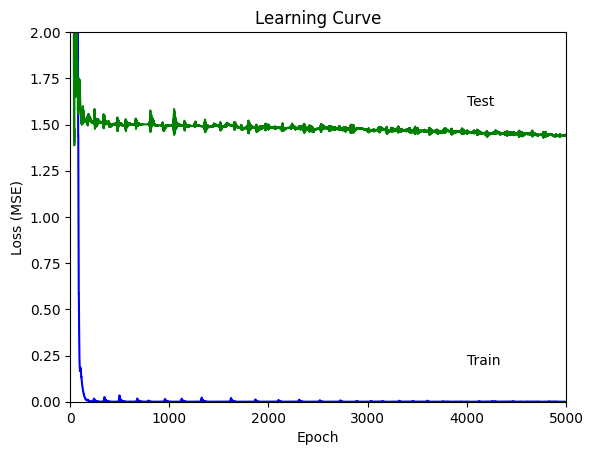

In [ ]:
plt.ylim(0,2)
plt.xlim((0,5000))
plt.annotate(text = 'Test',xy = (4000,1.6))
plt.annotate(text = 'Train',xy = (4000,0.2))
plt.plot(loss_train_history,'b')
plt.plot(loss_test_history,'g')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.show()


#### Testing whether the model is learning

In [ ]:
#Creating 1000 random sequences:
# Define the 20 standard amino acid one-letter codes
amino_acids = np.array(list("ARNDCEQGHILKMFPSTWYV"))

# Create random sequences
num_sequences = 1000
sequence_length = 20

# Randomly choose amino acids for each position in each sequence
random_sequences = np.random.choice(amino_acids, size=(num_sequences, sequence_length))
##Create a 3D array from 2D array containing sequences of a.a
list0 = []
for sequence in random_sequences:
    list1 =[]
    for aa in sequence:
        list1.append(aa_properties_normalized[aa])
    list0.append(list1)
properties_array = np.array(list0,dtype=float)

##Flatten axis 1,2 to get 140 features -> for Neural Network input
flattened_properties_array = properties_array.reshape(properties_array.shape[0],-1)
flattened_properties_array = torch.tensor(flattened_properties_array,dtype = torch.float32)

In [ ]:
model.eval()
print(model(flattened_properties_array))
##Neural network overfitting compared to standardized

tensor([[-11.1944],
        [-10.8371],
        [-11.0858],
        [-10.8802],
        [-11.1809],
        [-10.8823],
        [-10.7572],
        [-10.9724],
        [-11.5259],
        [-10.7484],
        [-11.6818],
        [-11.7843],
        [-11.0919],
        [-12.1910],
        [-10.7517],
        [-11.3514],
        [-11.4165],
        [-11.6504],
        [-10.3572],
        [-11.3756],
        [-11.9161],
        [-11.2573],
        [-11.4674],
        [-10.8923],
        [-11.8217],
        [-10.9771],
        [-10.9373],
        [-12.4271],
        [-10.6762],
        [-10.6952],
        [-10.1131],
        [-11.6094],
        [-11.0926],
        [-11.9113],
        [-12.4407],
        [-10.8560],
        [-10.4620],
        [-11.2137],
        [-10.0538],
        [-11.3921],
        [-11.6656],
        [-11.0639],
        [-10.8629],
        [-11.1135],
        [-10.7504],
        [-11.9686],
        [-11.7801],
        [-11.0078],
        [-10.7648],
        [-11.9955],


## Reducing size of neural network

In [ ]:
##Using nn model from pytorch
#Create a Model Class that inherists nn.Module
class Model2(nn.Module):
    ##Input layer (140 vectors + 1 bias term)
    ##Hidden layer 1 (10-50 neurons)
    ##Hidden layer 2 (10-50 neurons)
    ##Hidden layer 3 (10-50 neurons)
    ##Output: Score
    def __init__(self, in_features = 140, h=50, h = 50, h=50, out_features = 1):
        super().__init__()
        self.linear_sigmoid = nn.Sequential(
            nn.Linear(in_features,h),
            nn.BatchNorm1d(h),
            nn.ReLU(),
            nn.Linear(h,h),
            nn.BatchNorm1d(h),
            nn.ReLU(),
            nn.Linear(h,h),
            nn.BatchNorm1d(h),
            nn.ReLU(),
            nn.Linear(h,out_features)
        )
    def forward(self, x):
        return(self.linear_sigmoid(x))

In [ ]:

##for normalized data
##Best LR = 10^-2
##Reset criterion and model2 and optimizer
criterion = nn.MSELoss()
model2 = Model2()
optimizer = Adam(model2.parameters(),lr = 10**-2)

##Assigning train and test dataset
##Load dataset
train_X = torch.from_numpy(X_train).float()  # or .type(torch.float32)
train_y= torch.from_numpy(y_train).float().reshape(-1, 1)
test_X = torch.from_numpy(X_test).float()  # or .type(torch.float32)
test_y = torch.from_numpy(y_test).float().reshape(-1, 1)
epoch = 5000
loss_train_history = []
loss_test_history =[]
for i in np.arange(epoch):
    model2.train()
    ##Forward pass
    y_pred = model2(train_X)
    loss = criterion(y_pred,train_y)
    ##Backward pass
    optimizer.zero_grad()
    loss.backward()
    loss_train_history.append(loss.item())
    #Update weight
    optimizer.step()
    print("epoch:" ,i," loss:",loss)
    model2.eval()
    loss_train_history.append(loss.item())
    with torch.no_grad():
        loss = None
        y_pred = model2(test_X)
        loss = criterion(y_pred,test_y)
        loss_test_history.append(loss.item())
    

epoch: 0  loss: tensor(114.2894, grad_fn=<MseLossBackward0>)
epoch: 1  loss: tensor(66.0674, grad_fn=<MseLossBackward0>)
epoch: 2  loss: tensor(26.7623, grad_fn=<MseLossBackward0>)
epoch: 3  loss: tensor(4.9495, grad_fn=<MseLossBackward0>)
epoch: 4  loss: tensor(15.1810, grad_fn=<MseLossBackward0>)
epoch: 5  loss: tensor(31.3583, grad_fn=<MseLossBackward0>)
epoch: 6  loss: tensor(21.0773, grad_fn=<MseLossBackward0>)
epoch: 7  loss: tensor(9.8751, grad_fn=<MseLossBackward0>)
epoch: 8  loss: tensor(2.7203, grad_fn=<MseLossBackward0>)
epoch: 9  loss: tensor(2.2992, grad_fn=<MseLossBackward0>)
epoch: 10  loss: tensor(5.2714, grad_fn=<MseLossBackward0>)
epoch: 11  loss: tensor(8.3160, grad_fn=<MseLossBackward0>)
epoch: 12  loss: tensor(9.6145, grad_fn=<MseLossBackward0>)
epoch: 13  loss: tensor(8.7934, grad_fn=<MseLossBackward0>)
epoch: 14  loss: tensor(6.4292, grad_fn=<MseLossBackward0>)
epoch: 15  loss: tensor(3.6045, grad_fn=<MseLossBackward0>)
epoch: 16  loss: tensor(1.5021, grad_fn=<Ms

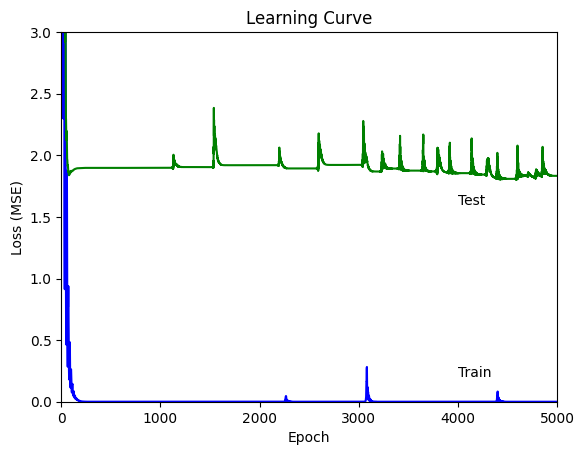

In [38]:
plt.ylim(0,3)
plt.xlim((0,5000))
plt.annotate(text = 'Test',xy = (4000,1.6))
plt.annotate(text = 'Train',xy = (4000,0.2))
plt.plot(loss_train_history,'b')
plt.plot(loss_test_history,'g')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.show()


## Adding dropout, batch normalization, and keep the size the same

In [ ]:
##Using nn model from pytorch
#Create a Model Class that inherists nn.Module
class Model3(nn.Module):
    ##Input layer (140 vectors + 1 bias term)
    ##Hidden layer 1 (10-50 neurons)
    ##Hidden layer 2 (10-50 neurons)
    ##Hidden layer 3 (10-50 neurons)
    ##Output: Score
    def __init__(self, in_features = 140, h=50, h = 50, h=50, out_features = 1):
        super().__init__()
        self.linear_sigmoid = nn.Sequential(
            nn.Linear(in_features,h),
            nn.Dropout(p = 0.3),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,h),
            nn.Dropout(p = 0.3),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Dropout(p = 0.3),
            nn.Linear(h,h),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,out_features)
        )
    def forward(self, x):
        return(self.linear_sigmoid(x))

In [ ]:

##for normalized data
##Best LR = 10^-2
##Reset criterion and model3 and optimizer
criterion = nn.MSELoss()
model3 = Model3()
optimizer = Adam(model3.parameters(),lr = 10**-2)

##Assigning train and test dataset
##Load dataset
train_X = torch.from_numpy(X_train).float()  # or .type(torch.float32)
train_y= torch.from_numpy(y_train).float().reshape(-1, 1)
test_X = torch.from_numpy(X_test).float()  # or .type(torch.float32)
test_y = torch.from_numpy(y_test).float().reshape(-1, 1)
epoch = 5000
loss_train_history = []
loss_test_history =[]
for i in np.arange(epoch):
    model3.train()
    ##Forward pass
    y_pred = model3(train_X)
    loss = criterion(y_pred,train_y)
    ##Backward pass
    optimizer.zero_grad()
    loss.backward()
    loss_train_history.append(loss.item())
    #Update weight
    optimizer.step()
    print("epoch:" ,i," loss:",loss)
    model3.eval()
    loss_train_history.append(loss.item())
    with torch.no_grad():
        loss = None
        y_pred = model3(test_X)
        loss = criterion(y_pred,test_y)
        loss_test_history.append(loss.item())
    

epoch: 0  loss: tensor(114.3277, grad_fn=<MseLossBackward0>)
epoch: 1  loss: tensor(108.6985, grad_fn=<MseLossBackward0>)
epoch: 2  loss: tensor(103.2021, grad_fn=<MseLossBackward0>)
epoch: 3  loss: tensor(97.8566, grad_fn=<MseLossBackward0>)
epoch: 4  loss: tensor(92.6140, grad_fn=<MseLossBackward0>)
epoch: 5  loss: tensor(87.5275, grad_fn=<MseLossBackward0>)
epoch: 6  loss: tensor(82.5951, grad_fn=<MseLossBackward0>)
epoch: 7  loss: tensor(77.8099, grad_fn=<MseLossBackward0>)
epoch: 8  loss: tensor(73.1187, grad_fn=<MseLossBackward0>)
epoch: 9  loss: tensor(68.5946, grad_fn=<MseLossBackward0>)
epoch: 10  loss: tensor(64.2245, grad_fn=<MseLossBackward0>)
epoch: 11  loss: tensor(59.9647, grad_fn=<MseLossBackward0>)
epoch: 12  loss: tensor(55.9009, grad_fn=<MseLossBackward0>)
epoch: 13  loss: tensor(51.9259, grad_fn=<MseLossBackward0>)
epoch: 14  loss: tensor(48.1023, grad_fn=<MseLossBackward0>)
epoch: 15  loss: tensor(44.4976, grad_fn=<MseLossBackward0>)
epoch: 16  loss: tensor(40.9855

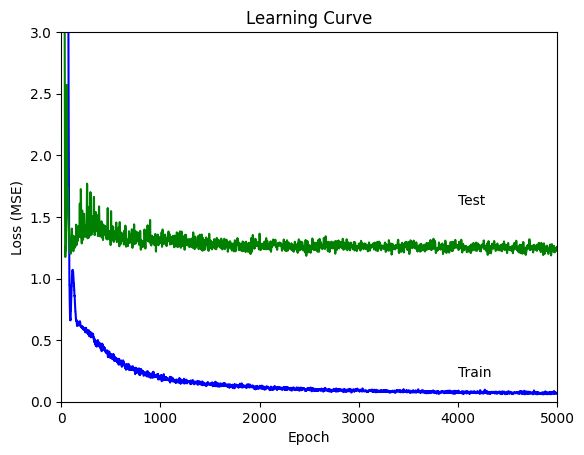

In [42]:
plt.ylim(0,3)
plt.xlim((0,5000))
plt.annotate(text = 'Test',xy = (4000,1.6))
plt.annotate(text = 'Train',xy = (4000,0.2))
plt.plot(loss_train_history,'b')
plt.plot(loss_test_history,'g')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.show()


In [ ]:
##Using nn model from pytorch
#Create a Model Class that inherists nn.Module
class Model4(nn.Module):
    ##Input layer (140 vectors + 1 bias term)
    ##Hidden layer 1 (10-50 neurons)
    ##Hidden layer 2 (10-50 neurons)
    ##Hidden layer 3 (10-50 neurons)
    ##Output: Score
    def __init__(self, in_features = 140, h=50, h = 50, h=50, out_features = 1):
        super().__init__()
        self.linear_sigmoid = nn.Sequential(
            nn.Linear(in_features,h),
            nn.Dropout(p = 0.5),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,h),
            nn.Dropout(p = 0.5),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Dropout(p = 0.5),
            nn.Linear(h,h),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,out_features)
        )
    def forward(self, x):
        return(self.linear_sigmoid(x))

In [70]:

##for normalized data
##Best LR = 10^-2
##Reset criterion and model4 and optimizer
criterion = nn.MSELoss()
model4 = Model4()
optimizer = Adam(model4.parameters(),lr = 10**-2)

##Assigning train and test dataset
##Load dataset
train_X = torch.from_numpy(X_train).float()  # or .type(torch.float32)
train_y= torch.from_numpy(y_train).float().reshape(-1, 1)
test_X = torch.from_numpy(X_test).float()  # or .type(torch.float32)
test_y = torch.from_numpy(y_test).float().reshape(-1, 1)
epoch = 5000
loss_train_history = []
loss_test_history =[]
for i in np.arange(epoch):
    model4.train()
    ##Forward pass
    y_pred = model4(train_X)
    loss = criterion(y_pred,train_y)
    ##Backward pass
    optimizer.zero_grad()
    loss.backward()
    loss_train_history.append(loss.item())
    #Update weight
    optimizer.step()
    print("epoch:" ,i," loss:",loss)
    model4.eval()
    loss_train_history.append(loss.item())
    with torch.no_grad():
        loss = None
        y_pred = model4(test_X)
        loss = criterion(y_pred,test_y)
        loss_test_history.append(loss.item())
    

epoch: 0  loss: tensor(135.4040, grad_fn=<MseLossBackward0>)
epoch: 1  loss: tensor(129.2426, grad_fn=<MseLossBackward0>)
epoch: 2  loss: tensor(123.2605, grad_fn=<MseLossBackward0>)
epoch: 3  loss: tensor(117.3885, grad_fn=<MseLossBackward0>)
epoch: 4  loss: tensor(111.7015, grad_fn=<MseLossBackward0>)
epoch: 5  loss: tensor(106.2004, grad_fn=<MseLossBackward0>)
epoch: 6  loss: tensor(100.8038, grad_fn=<MseLossBackward0>)
epoch: 7  loss: tensor(95.5771, grad_fn=<MseLossBackward0>)
epoch: 8  loss: tensor(90.5100, grad_fn=<MseLossBackward0>)
epoch: 9  loss: tensor(85.5609, grad_fn=<MseLossBackward0>)
epoch: 10  loss: tensor(80.8110, grad_fn=<MseLossBackward0>)
epoch: 11  loss: tensor(76.1409, grad_fn=<MseLossBackward0>)
epoch: 12  loss: tensor(71.6811, grad_fn=<MseLossBackward0>)
epoch: 13  loss: tensor(67.3614, grad_fn=<MseLossBackward0>)
epoch: 14  loss: tensor(63.1279, grad_fn=<MseLossBackward0>)
epoch: 15  loss: tensor(59.0698, grad_fn=<MseLossBackward0>)
epoch: 16  loss: tensor(55.

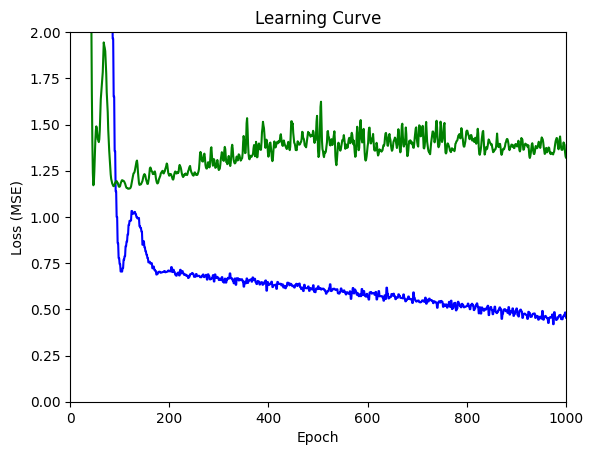

In [74]:
plt.ylim(0,2)
plt.xlim((0,1000))
plt.annotate(text = 'Test',xy = (4000,1.6))
plt.annotate(text = 'Train',xy = (4000,0.2))
plt.plot(loss_train_history,'b')
plt.plot(loss_test_history,'g')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.show()


In [ ]:
""" Use this cell to export weight values
import csv
for name, param in best_weights.items():
    np.savetxt(f"{name.replace('.', '_')}.csv", param.cpu().numpy(), delimiter=",")
"""

## Models with bigger size + dropout

In [ ]:
##Using nn model from pytorch
#Create a Model Class that inherists nn.Module
class Model5(nn.Module):
    ##Input layer (140 vectors + 1 bias term)
    ##Hidden layer 1 (10-50 neurons)
    ##Hidden layer 2 (10-50 neurons)
    ##Hidden layer 3 (10-50 neurons)
    ##Output: Score
    def __init__(self, in_features = 140, h=100, h = 100, h=100, out_features = 1):
        super().__init__()
        self.linear_sigmoid = nn.Sequential(
            nn.Linear(in_features,h),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,h),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,h),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,out_features)
        )
    def forward(self, x):
        return(self.linear_sigmoid(x))

In [49]:

##for normalized data
##Best LR = 10^-2
##Reset criterion and model5 and optimizer
criterion = nn.MSELoss()
model5 = Model5()
optimizer = Adam(model5.parameters(),lr = 10**-2)

##Assigning train and test dataset
##Load dataset
train_X = torch.from_numpy(X_train).float()  # or .type(torch.float32)
train_y= torch.from_numpy(y_train).float().reshape(-1, 1)
test_X = torch.from_numpy(X_test).float()  # or .type(torch.float32)
test_y = torch.from_numpy(y_test).float().reshape(-1, 1)
epoch = 5000
loss_train_history = []
loss_test_history =[]
for i in np.arange(epoch):
    model5.train()
    ##Forward pass
    y_pred = model5(train_X)
    loss = criterion(y_pred,train_y)
    ##Backward pass
    optimizer.zero_grad()
    loss.backward()
    loss_train_history.append(loss.item())
    #Update weight
    optimizer.step()
    print("epoch:" ,i," loss:",loss)
    model5.eval()
    loss_train_history.append(loss.item())
    with torch.no_grad():
        loss = None
        y_pred = model5(test_X)
        loss = criterion(y_pred,test_y)
        loss_test_history.append(loss.item())
    

epoch: 0  loss: tensor(126.1113, grad_fn=<MseLossBackward0>)
epoch: 1  loss: tensor(114.4378, grad_fn=<MseLossBackward0>)
epoch: 2  loss: tensor(103.4441, grad_fn=<MseLossBackward0>)
epoch: 3  loss: tensor(93.0700, grad_fn=<MseLossBackward0>)
epoch: 4  loss: tensor(83.2763, grad_fn=<MseLossBackward0>)
epoch: 5  loss: tensor(74.0426, grad_fn=<MseLossBackward0>)
epoch: 6  loss: tensor(65.3640, grad_fn=<MseLossBackward0>)
epoch: 7  loss: tensor(57.2411, grad_fn=<MseLossBackward0>)
epoch: 8  loss: tensor(49.6782, grad_fn=<MseLossBackward0>)
epoch: 9  loss: tensor(42.6815, grad_fn=<MseLossBackward0>)
epoch: 10  loss: tensor(36.2520, grad_fn=<MseLossBackward0>)
epoch: 11  loss: tensor(30.3812, grad_fn=<MseLossBackward0>)
epoch: 12  loss: tensor(25.0679, grad_fn=<MseLossBackward0>)
epoch: 13  loss: tensor(20.3160, grad_fn=<MseLossBackward0>)
epoch: 14  loss: tensor(16.1179, grad_fn=<MseLossBackward0>)
epoch: 15  loss: tensor(12.4645, grad_fn=<MseLossBackward0>)
epoch: 16  loss: tensor(9.3570,

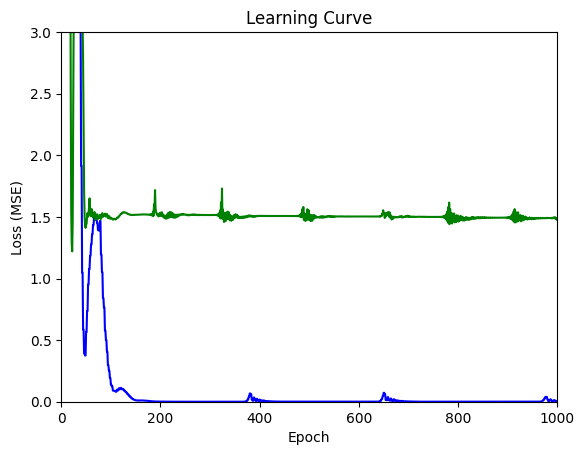

In [50]:
plt.ylim(0,3)
plt.xlim((0,1000))
plt.annotate(text = 'Test',xy = (4000,1.6))
plt.annotate(text = 'Train',xy = (4000,0.2))
plt.plot(loss_train_history,'b')
plt.plot(loss_test_history,'g')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.show()


In [ ]:
##Using nn model from pytorch
#Create a Model Class that inherists nn.Module
class Model6(nn.Module):
    ##Input layer (140 vectors + 1 bias term)
    ##Hidden layer 1 (10-50 neurons)
    ##Hidden layer 2 (10-50 neurons)
    ##Hidden layer 3 (10-50 neurons)
    ##Output: Score
    def __init__(self, in_features = 140, h=100, out_features = 1,dropout = 0.1):
        super().__init__()
        self.linear_sigmoid = nn.Sequential(
            nn.Linear(in_features,h),
            nn.Dropout(dropout),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,h),
            nn.Dropout(dropout),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,h),
            nn.Dropout(dropout),
            nn.BatchNorm1d(h),
            nn.Sigmoid(),
            nn.Linear(h,out_features)
        )
    def forward(self, x):
        return(self.linear_sigmoid(x))

In [53]:
loss_test_history_batch = []
loss_train_history_batch = []
for dropout in [0.3,0.4,0.5,0.6]:
##for normalized data
##Best LR = 10^-2
##Reset criterion and model6 and optimizer
    criterion = nn.MSELoss()
    model6 = Model6()
    optimizer = Adam(model6.parameters(),lr = 10**-2)

    ##Assigning train and test dataset
    ##Load dataset
    train_X = torch.from_numpy(X_train).float()  # or .type(torch.float32)
    train_y= torch.from_numpy(y_train).float().reshape(-1, 1)
    test_X = torch.from_numpy(X_test).float()  # or .type(torch.float32)
    test_y = torch.from_numpy(y_test).float().reshape(-1, 1)
    epoch = 5000
    loss_train_history = []
    loss_test_history =[]
    for i in np.arange(epoch):
        model6.train()
        ##Forward pass
        y_pred = model6(train_X)
        loss = criterion(y_pred,train_y)
        ##Backward pass
        optimizer.zero_grad()
        loss.backward()
        loss_train_history.append(loss.item())
        #Update weight
        optimizer.step()
        print("epoch:" ,i," loss:",loss)
        model6.eval()
        loss_train_history.append(loss.item())
        with torch.no_grad():
            loss = None
            y_pred = model6(test_X)
            loss = criterion(y_pred,test_y)
            loss_test_history.append(loss.item())
    loss_test_history_batch.append(loss_test_history)
    loss_train_history_batch.append(loss_train_history)
    

epoch: 0  loss: tensor(121.3503, grad_fn=<MseLossBackward0>)
epoch: 1  loss: tensor(109.5933, grad_fn=<MseLossBackward0>)
epoch: 2  loss: tensor(98.0973, grad_fn=<MseLossBackward0>)
epoch: 3  loss: tensor(87.6071, grad_fn=<MseLossBackward0>)
epoch: 4  loss: tensor(77.9672, grad_fn=<MseLossBackward0>)
epoch: 5  loss: tensor(68.9279, grad_fn=<MseLossBackward0>)
epoch: 6  loss: tensor(60.4283, grad_fn=<MseLossBackward0>)
epoch: 7  loss: tensor(52.5315, grad_fn=<MseLossBackward0>)
epoch: 8  loss: tensor(45.2298, grad_fn=<MseLossBackward0>)
epoch: 9  loss: tensor(38.5608, grad_fn=<MseLossBackward0>)
epoch: 10  loss: tensor(32.4427, grad_fn=<MseLossBackward0>)
epoch: 11  loss: tensor(26.9358, grad_fn=<MseLossBackward0>)
epoch: 12  loss: tensor(21.9802, grad_fn=<MseLossBackward0>)
epoch: 13  loss: tensor(17.6255, grad_fn=<MseLossBackward0>)
epoch: 14  loss: tensor(13.8423, grad_fn=<MseLossBackward0>)
epoch: 15  loss: tensor(10.5833, grad_fn=<MseLossBackward0>)
epoch: 16  loss: tensor(7.8738, 

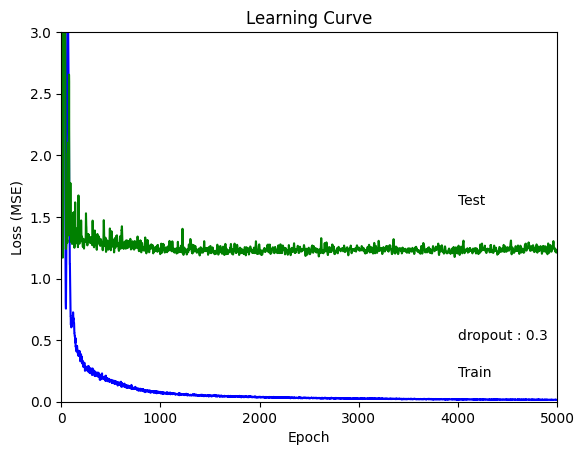

In [64]:
plt.ylim(0,3)
plt.xlim((0,5000))
plt.annotate(text = 'Test',xy = (4000,1.6))
plt.annotate(text = 'Train',xy = (4000,0.2))
plt.annotate(text = 'dropout : 0.3',xy = (4000,0.5))
plt.plot(loss_train_history_batch[0],'b')
plt.plot(loss_test_history_batch[0],'g')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.show()


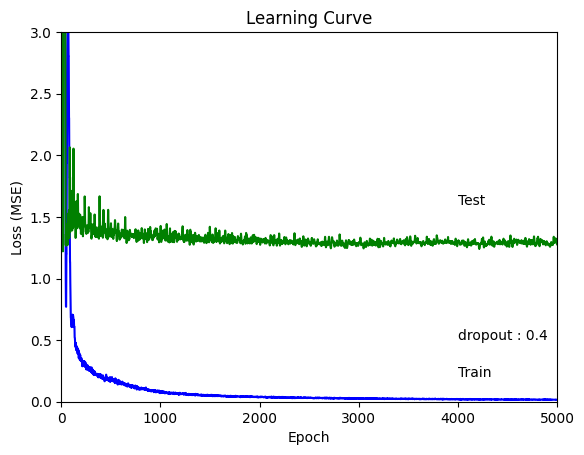

In [66]:
plt.ylim(0,3)
plt.xlim((0,5000))
plt.annotate(text = 'Test',xy = (4000,1.6))
plt.annotate(text = 'Train',xy = (4000,0.2))
plt.annotate(text = 'dropout : 0.4',xy = (4000,0.5))
plt.plot(loss_train_history_batch[1],'b')
plt.plot(loss_test_history_batch[1],'g')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.show()


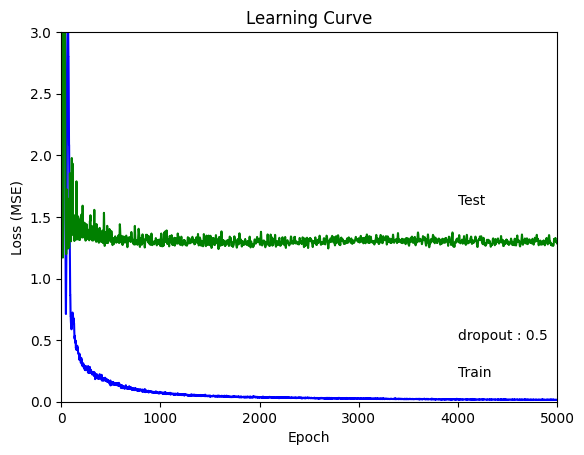

In [67]:
plt.ylim(0,3)
plt.xlim((0,5000))
plt.annotate(text = 'Test',xy = (4000,1.6))
plt.annotate(text = 'Train',xy = (4000,0.2))
plt.annotate(text = 'dropout : 0.5',xy = (4000,0.5))
plt.plot(loss_train_history_batch[2],'b')
plt.plot(loss_test_history_batch[2],'g')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.show()


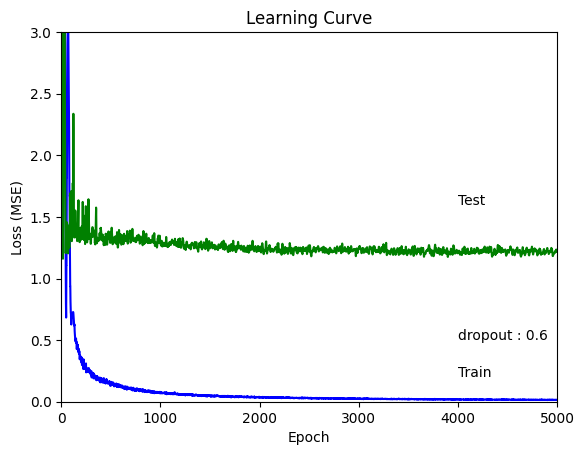

In [68]:
plt.ylim(0,3)
plt.xlim((0,5000))
plt.annotate(text = 'Test',xy = (4000,1.6))
plt.annotate(text = 'Train',xy = (4000,0.2))
plt.annotate(text = 'dropout : 0.6',xy = (4000,0.5))
plt.plot(loss_train_history_batch[3],'b')
plt.plot(loss_test_history_batch[3],'g')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.show()


In [ ]:
# Hold the best model2
best_mse2 = np.inf   # init to infinity
best_weight2 = None
history2 = []
for learning_rate in [10**-4, 30**-4, 10**-3, 30**-3, 10**-2, 30**-2, 10**-1, 30**-1, 1]:
    history_per_lr2= []
    kf = KFold(n_splits=10,shuffle=True,random_state=42)
    for train,test in kf.split(X):
        ##Reset criterion and model2 and optimizer
        criterion = nn.MSELoss()
        model2 = Model2()
        optimizer = Adam(model2.parameters(),lr = learning_rate)

        ##Assigning train and test dataset
        train_X = X[train]
        train_y = y[train]
        test_X = X[test]
        test_y = y[test]

        ##Load dataset
        X_train = torch.from_numpy(train_X).float()  # or .type(torch.float32)
        y_train = torch.from_numpy(train_y).float().reshape(-1, 1)

        X_test = torch.from_numpy(test_X).float()
        y_test = torch.from_numpy(test_y).float().reshape(-1, 1)
    
        epoch = 4000
        for i in np.arange(epoch):
            model2.train()
            ##Forward pass
            y_pred = model2(X_train)
            loss = criterion(y_pred,y_train)
            ##Backward pass
            optimizer.zero_grad()
            loss.backward()
            #Update weight
            optimizer.step()
            if (i%500==0):
                print("epoch:" ,i," loss:",loss)
        with torch.no_grad():
            predicted = model2(X_test)
            mse = criterion(predicted, y_test)
            print(f'Mean Squared Error: {mse.item():.4f}')
            history_per_lr2.append(mse.item())
        history2.append(history_per_lr2)

    


epoch: 0  loss: tensor(128.1559, grad_fn=<MseLossBackward0>)
epoch: 500  loss: tensor(37.4610, grad_fn=<MseLossBackward0>)
epoch: 1000  loss: tensor(11.8890, grad_fn=<MseLossBackward0>)
epoch: 1500  loss: tensor(2.7820, grad_fn=<MseLossBackward0>)
epoch: 2000  loss: tensor(0.8768, grad_fn=<MseLossBackward0>)
epoch: 2500  loss: tensor(0.6941, grad_fn=<MseLossBackward0>)
epoch: 3000  loss: tensor(0.6675, grad_fn=<MseLossBackward0>)
epoch: 3500  loss: tensor(0.6480, grad_fn=<MseLossBackward0>)
Mean Squared Error: 1.6230
epoch: 0  loss: tensor(133.0608, grad_fn=<MseLossBackward0>)
epoch: 500  loss: tensor(43.8547, grad_fn=<MseLossBackward0>)
epoch: 1000  loss: tensor(16.9799, grad_fn=<MseLossBackward0>)
epoch: 1500  loss: tensor(4.5926, grad_fn=<MseLossBackward0>)
epoch: 2000  loss: tensor(1.2678, grad_fn=<MseLossBackward0>)
epoch: 2500  loss: tensor(0.8027, grad_fn=<MseLossBackward0>)
epoch: 3000  loss: tensor(0.7650, grad_fn=<MseLossBackward0>)
epoch: 3500  loss: tensor(0.7505, grad_fn=<

## Hyperparameter tuning using sklearn wrapped with skorch

In [13]:
##Using nn model from pytorch
#Create a Model Class that inherists nn.Module
class Model7(nn.Module):
    ##Input: 140 features
    ##Output: Score
    def __init__(self, in_features = 140, h = 100, out_features = 1,dropout = 0.1, activation = nn.ReLU):
        super().__init__()
        self.activation = activation()
        self.linear_sigmoid = nn.Sequential(
            nn.Linear(in_features,h),
            nn.Dropout(dropout),
            nn.BatchNorm1d(h),
            self.activation,
            nn.Linear(h,h),
            nn.Dropout(dropout),
            nn.BatchNorm1d(h),
            self.activation,
            nn.Linear(h,h),
            nn.Dropout(dropout),
            nn.BatchNorm1d(h),
            self.activation,
            nn.Linear(h,out_features)
        )
    def forward(self, x):
        return(self.linear_sigmoid(x))

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,randint
from skorch import NeuralNetRegressor
from skorch.callbacks import EarlyStopping

In [15]:
##Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:

net = NeuralNetRegressor(
    Model7,
    module__h=150,
    module__dropout = 0.5,
    module__activation=F.sigmoid,
    max_epochs=50,
    lr=0.01,
    optimizer=torch.optim.Adam,
    criterion=nn.MSELoss,
    callbacks = [EarlyStopping(patience = 10, threshold = 0.001)]
)

params = {
    'lr': uniform(10**-3,1),
    'max_epochs': randint(50, 200),
    'module__h': randint(25, 150),
    'module__dropout': uniform(0,0.4),
    'module__activation': [nn.ReLU,nn.Sigmoid,nn.Tanh]
}

rs = RandomizedSearchCV(
    net,
    param_distributions=params,
    n_iter=100,
    cv=10,
    scoring='neg_mean_squared_error',
    random_state=42,
    return_train_score=True
)
rs.fit(X_train.astype(np.float32), y_train.astype(np.float32).reshape(-1, 1))

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1       51.9438       14.0489  0.0876
      2       10.4264        3.2546  0.0473
      3        4.2063        1.2239  0.0581
      4        2.3921        2.3149  0.0629
      5        1.3715        0.7795  0.0568
      6        1.2410        1.4699  0.0473
      7        1.1763        0.6969  0.0508
      8        0.9936        0.7131  0.0623
      9        1.0124        0.9682  0.0619
     10        0.9805        0.9340  0.0679
     11        1.0217        0.6917  0.0677
     12        1.0029        0.7575  0.0615
     13        0.9494        0.6829  0.0762
     14        1.0475        0.6752  0.0821
     15        1.0537        0.7348  0.0701
     16        1.0090        0.7004  0.0544
     17        1.0111        0.8805  0.0596
     18        1.1439        0.7395  0.0645
     19        1.1989        0.6924  0.0553
     20        1.1139        0.8442  0.0525
     21        1.0968        0.7

RandomizedSearchCV(cv=10,
                   estimator=NeuralNetRegressor(_params_to_validate={'module__dropout', 'module__activation', 'module__h'}, batch_size=128, callbacks=[<skorch.callbacks.training.EarlyStopping object at 0x00000215B6BF3050>], compile=False, dataset=<class 'skorch.dataset.Dataset'>, device='cpu', iterator_train=<class 'torch.utils.data.dataloader.DataLoader'...
                                                               <class 'torch.nn.modules.activation.Sigmoid'>,
                                                               <class 'torch.nn.modules.activation.Tanh'>],
                                        'module__dropout': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000215B6CA00E0>,
                                        'module__h': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000215B6C8FB90>},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [18]:
rs.best_score_

-0.7486450284719467

In [19]:
rs.predict(X_test.astype(np.float32))


array([[-11.544768 ],
       [-11.545494 ],
       [-11.550372 ],
       [-11.550219 ],
       [-11.543729 ],
       [-11.550852 ],
       [-11.546477 ],
       [-11.548868 ],
       [-11.542843 ],
       [-11.543703 ],
       [-11.549213 ],
       [-11.548209 ],
       [-11.546584 ],
       [-11.550282 ],
       [-11.547134 ],
       [-11.545981 ],
       [-11.544886 ],
       [-11.54488  ],
       [-11.544859 ],
       [-11.548021 ],
       [-11.547217 ],
       [-11.546997 ],
       [-11.544914 ],
       [-11.549556 ],
       [-11.544629 ],
       [-11.543434 ],
       [-11.547771 ],
       [-11.5465975],
       [-11.548299 ],
       [-11.548784 ],
       [-11.543317 ],
       [-11.546921 ],
       [-11.548749 ],
       [-11.545532 ],
       [-11.545937 ],
       [-11.549    ],
       [-11.551031 ],
       [-11.543829 ],
       [-11.550221 ],
       [-11.549695 ],
       [-11.545733 ],
       [-11.5451355],
       [-11.543041 ],
       [-11.550442 ],
       [-11.549293 ],
       [-1

In [ ]:
##The model seems to predict around the point -11

In [ ]:
##Using nn model from pytorch
#Create a Model Class that inherists nn.Module
class Model8(nn.Module):
    ##Input: 140 features
    ##Output: Score
    def __init__(self, in_features = 140, h = 100, out_features = 1, activation = nn.ReLU):
        super().__init__()
        self.activation = activation()
        self.linear_sigmoid = nn.Sequential(
            nn.Linear(in_features,h),
            nn.BatchNorm1d(h),
            self.activation,
            nn.Linear(h,h),
            nn.BatchNorm1d(h),
            self.activation,
            nn.Linear(h,h),
            nn.BatchNorm1d(h),
            self.activation,
            nn.Linear(h,out_features)
        )
    def forward(self, x):
        return(self.linear_sigmoid(x))

In [ ]:

net2 = NeuralNetRegressor(
    Model8,
    module__h=150,
    module__activation=F.sigmoid,
    max_epochs=50,
    lr=0.01,
    optimizer=torch.optim.Adam,
    criterion=nn.MSELoss,
    callbacks = [EarlyStopping(patience = 10, threshold = 0.001)]
)

params2 = {
    'lr': uniform(10**-3,1),
    'max_epochs': randint(50, 500),
    'module__h': randint(50,200),
    'module__activation': [nn.ReLU,nn.Sigmoid,nn.Tanh]
}

rs2 = RandomizedSearchCV(
    net2,
    param_distributions=params2,
    n_iter=100,
    cv=10,
    scoring='neg_mean_squared_error',
    random_state=42,
    return_train_score=True
)
rs2.fit(X_train.astype(np.float32), y_train.astype(np.float32).reshape(-1, 1))

NameError: name 'NeuralNetRegressor' is not defined

In [ ]:
import csv
for name, param in best_weight2.items():
    np.savetxt(f"{name.replace('.', '_')}.csv", param.cpu().numpy(), delimiter=",")

KeyboardInterrupt: 

# LSTM model

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam
from sklearn.model_selection import KFold

In [19]:
##Create the dataset instead of manually load
class DockingDataset(Dataset):
    def __init__(self, sequences, scores):
        self.sequences = torch.tensor(sequences, dtype=torch.float32)
        self.scores = torch.tensor(scores, dtype=torch.float32)

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.scores[idx]

## LSTM model with bidirectional layer, no dropout

In [ ]:
class DockingScorePredictorBiLSTM(nn.Module):
    def __init__(self, input_dim=7, hidden_dim=128, output_dim=1, num_layers=2):
        super(DockingScorePredictorBiLSTM, self).__init__()

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        
        # Fully connected layer: Since it's bidirectional, hidden_dim * 2
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        # x shape: [batch_size, sequence_length, input_dim] (batch_first = true)
        output, (h_n, c_n) = self.lstm(x)  
        
        # Concatenate the final hidden state from both directions only from the last layer (which used to calculate docking score)
        h_forward = h_n[-2, :, :]  # Forward direction
        h_backward = h_n[-1, :, :]  # Backward direction
        
        # Concatenate forward and backward hidden states
        h_final = torch.cat((h_forward, h_backward), dim=1)
        
        # Pass through the fully connected layer
        output = self.fc(h_final)
        return output

In [ ]:
from torch.utils.data import DataLoader, Dataset, Subset
from sklearn.model_selection import KFold

In [57]:
##Hyperparameters
input_dim = 7
hidden_dim = 128
num_layers = 2
batch_size = 256
learning_rate = 0.01
epochs = 25
k_folds = 5

##Load Dataset
train_dataset = DockingDataset(X_train, y_train)
data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

kfold = KFold(n_splits=k_folds, shuffle=True)
fold_results = {}

for fold, (train_ids, val_ids) in enumerate(kfold.split(train_dataset)):
    print(f"\nTraining Fold {fold + 1}/{k_folds}")
    
    # Create data loaders
    train_subsampler = Subset(train_dataset, train_ids)
    val_subsampler = Subset(train_dataset, val_ids)
    
    train_loader = DataLoader(train_subsampler, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subsampler, batch_size=batch_size, shuffle=False)
    
    # Initialize the model, criterion and optimizer
    model = DockingScorePredictorBiLSTM(input_dim, hidden_dim, 1, num_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        epoch_train_loss = 0
        for inputs, targets in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_train_loss += loss.item()
        
        # Average training loss for the epoch
        avg_train_loss = epoch_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation loop
        model.eval()
        epoch_val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), targets)
                epoch_val_loss += loss.item()
        
        # Average validation loss for the epoch
        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        print(f"Epoch [{epoch + 1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")
    
    # Store results for each fold
    fold_results[fold] = {'train_loss': train_losses,'val_loss': val_losses}



Training Fold 1/5
Epoch [1/25], Training Loss: 69.9041, Validation Loss: 2.6427
Epoch [2/25], Training Loss: 3.6325, Validation Loss: 4.6777
Epoch [3/25], Training Loss: 3.3266, Validation Loss: 0.5999
Epoch [4/25], Training Loss: 1.0710, Validation Loss: 1.7107
Epoch [5/25], Training Loss: 1.6559, Validation Loss: 0.7749
Epoch [6/25], Training Loss: 0.8826, Validation Loss: 0.7797
Epoch [7/25], Training Loss: 1.1472, Validation Loss: 0.6425
Epoch [8/25], Training Loss: 0.8641, Validation Loss: 0.6743
Epoch [9/25], Training Loss: 0.9186, Validation Loss: 0.6450
Epoch [10/25], Training Loss: 0.8056, Validation Loss: 0.5477
Epoch [11/25], Training Loss: 0.8567, Validation Loss: 0.5585
Epoch [12/25], Training Loss: 0.8148, Validation Loss: 0.5716
Epoch [13/25], Training Loss: 0.8235, Validation Loss: 0.5708
Epoch [14/25], Training Loss: 0.7975, Validation Loss: 0.5369
Epoch [15/25], Training Loss: 0.8096, Validation Loss: 0.5357
Epoch [16/25], Training Loss: 0.8045, Validation Loss: 0.55

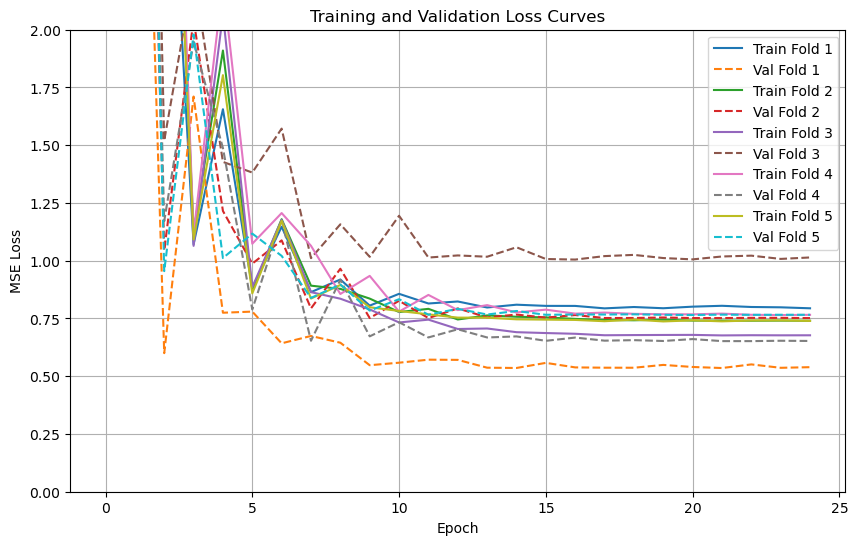

In [58]:
plt.figure(figsize=(10, 6))
for fold, results in fold_results.items():
    plt.plot(results['train_loss'], label=f"Train Fold {fold + 1}")
    plt.plot(results['val_loss'], label=f"Val Fold {fold + 1}", linestyle='--')
plt.title("Training and Validation Loss Curves")
plt.ylim(0,2)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


In [61]:
"""
test_dataset = DockingDataset(X_test, y_test)
# DataLoader for batch processing
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

model.eval()
all_predictions = []
all_targets = []
with torch.no_grad():
    loss_test_history = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        
        # Collect predictions and actual values
        all_predictions.append(outputs.squeeze().numpy())
        all_targets.append(targets.numpy())
# Convert list of arrays to single arrays
all_predictions = np.concatenate(all_predictions)
all_targets = np.concatenate(all_targets)


##Evaluate the model
mse = mean_squared_error(all_targets, all_predictions)
print(f"Test MSE: {mse:.4f}")

print(all_predictions)
"""
##Train with whole data set
train_loader = DataLoader(train_dataset,batch_size=256,shuffle=True)

# Initialize the model, criterion and optimizer
model = DockingScorePredictorBiLSTM(input_dim, hidden_dim, 1, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=0.01)

# Training loop
train_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    # Average training loss for the epoch
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)



In [63]:

model.eval()
with torch.no_grad():
    output = model(torch.tensor(X_test,dtype=torch.float32))
    print(output)
    loss = criterion(output.squeeze(),torch.tensor(y_test,dtype=torch.float32))
    print(loss.item())
    

tensor([[-11.4256],
        [-11.4166],
        [-11.4251],
        [-11.4268],
        [-11.4076],
        [-11.4046],
        [-11.4230],
        [-11.4139],
        [-11.4126],
        [-11.4115],
        [-11.4304],
        [-11.4107],
        [-11.4252],
        [-11.4190],
        [-11.4208],
        [-11.4269],
        [-11.4195],
        [-11.4212],
        [-11.4255],
        [-11.4170],
        [-11.4177],
        [-11.4333],
        [-11.4151],
        [-11.4143],
        [-11.4147],
        [-11.4162],
        [-11.4174],
        [-11.4053],
        [-11.4178],
        [-11.4177],
        [-11.4239],
        [-11.4063],
        [-11.4135],
        [-11.4136],
        [-11.4231],
        [-11.4161],
        [-11.4177],
        [-11.4110],
        [-11.4245],
        [-11.4116],
        [-11.4132],
        [-11.4152],
        [-11.4203],
        [-11.4267],
        [-11.4148],
        [-11.4060],
        [-11.4284],
        [-11.4161],
        [-11.4236],
        [-11.4264],


## LSTM model with regularization on Adam and dropout

In [16]:
from sklearn.metrics import mean_squared_error
from torch.utils.data import DataLoader, Dataset, Subset
from sklearn.model_selection import KFold

In [34]:
class DockingScorePredictorBiLSTM2(nn.Module):
    def __init__(self, input_dim=7, hidden_dim=128, output_dim=1, num_layers=2):
        super(DockingScorePredictorBiLSTM2, self).__init__()

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True,dropout= 0.3)
        # Fully connected layer: Since it's bidirectional, hidden_dim * 2
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        # x shape: [batch_size, sequence_length, input_dim] (batch_first = true)
        output, (h_n, c_n) = self.lstm(x)  
        
        # Concatenate the final hidden state from both directions only from the last layer (which used to calculate docking score)
        h_forward = h_n[-2, :, :]  # Forward direction
        h_backward = h_n[-1, :, :]  # Backward direction
        
        # Concatenate forward and backward hidden states
        h_final = torch.cat((h_forward, h_backward), dim=1)
        
        # Pass through the fully connected layer
        output = self.fc(h_final)
        return output

In [64]:
##Hyperparameters
input_dim = 7
hidden_dim = 128
num_layers = 2
batch_size = 256
learning_rate = 0.01
epochs = 25
k_folds = 5

##Load Dataset
train_dataset = DockingDataset(X_train, y_train)
data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

kfold = KFold(n_splits=k_folds, shuffle=True)
fold_results = {}

for fold, (train_ids, val_ids) in enumerate(kfold.split(train_dataset)):
    print(f"\nTraining Fold {fold + 1}/{k_folds}")
    
    # Create data loaders
    train_subsampler = Subset(train_dataset, train_ids)
    val_subsampler = Subset(train_dataset, val_ids)
    
    train_loader = DataLoader(train_subsampler, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subsampler, batch_size=batch_size, shuffle=False)
    
    # Initialize the model, criterion and optimizer
    model = DockingScorePredictorBiLSTM2(input_dim, hidden_dim, 1, num_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=0.01)

    # Training loop
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        epoch_train_loss = 0
        for inputs, targets in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_train_loss += loss.item()
        
        # Average training loss for the epoch
        avg_train_loss = epoch_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation loop
        model.eval()
        epoch_val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), targets)
                epoch_val_loss += loss.item()
        
        # Average validation loss for the epoch
        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        print(f"Epoch [{epoch + 1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")
    
    # Store results for each fold
    fold_results[fold] = {'train_loss': train_losses,'val_loss': val_losses}



Training Fold 1/5
Epoch [1/25], Training Loss: 68.7433, Validation Loss: 1.4410
Epoch [2/25], Training Loss: 4.7826, Validation Loss: 3.6031
Epoch [3/25], Training Loss: 1.5030, Validation Loss: 2.1032
Epoch [4/25], Training Loss: 1.9132, Validation Loss: 1.7413
Epoch [5/25], Training Loss: 0.8531, Validation Loss: 1.5582
Epoch [6/25], Training Loss: 1.1266, Validation Loss: 1.3192
Epoch [7/25], Training Loss: 0.7276, Validation Loss: 1.3836
Epoch [8/25], Training Loss: 0.8159, Validation Loss: 1.1578
Epoch [9/25], Training Loss: 0.6901, Validation Loss: 1.2652
Epoch [10/25], Training Loss: 0.6911, Validation Loss: 1.1851
Epoch [11/25], Training Loss: 0.6621, Validation Loss: 1.1538
Epoch [12/25], Training Loss: 0.6400, Validation Loss: 1.1583
Epoch [13/25], Training Loss: 0.6450, Validation Loss: 1.1568
Epoch [14/25], Training Loss: 0.6564, Validation Loss: 1.1537
Epoch [15/25], Training Loss: 0.6512, Validation Loss: 1.1534
Epoch [16/25], Training Loss: 0.6434, Validation Loss: 1.15

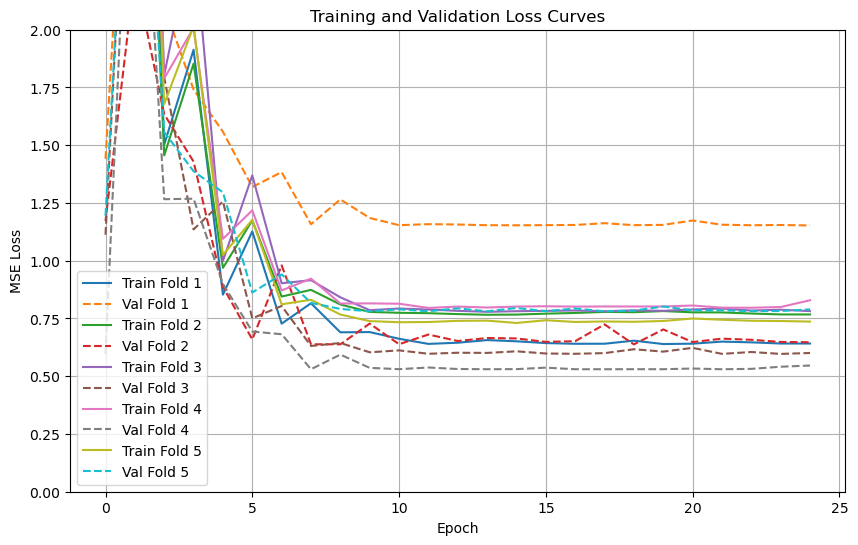

In [65]:
plt.figure(figsize=(10, 6))
for fold, results in fold_results.items():
    plt.plot(results['train_loss'], label=f"Train Fold {fold + 1}")
    plt.plot(results['val_loss'], label=f"Val Fold {fold + 1}", linestyle='--')
plt.title("Training and Validation Loss Curves")
plt.ylim(0,2)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


In [67]:
##Train with whole data set
train_loader = DataLoader(train_dataset,batch_size = 256, shuffle = True)

# Initialize the model, criterion and optimizer
model = DockingScorePredictorBiLSTM2(input_dim, hidden_dim, 1, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=0.01)

# Training loop
train_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    # Average training loss for the epoch
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)



C:\Users\tiend\AppData\Local\Temp\ipykernel_18040\2573333818.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


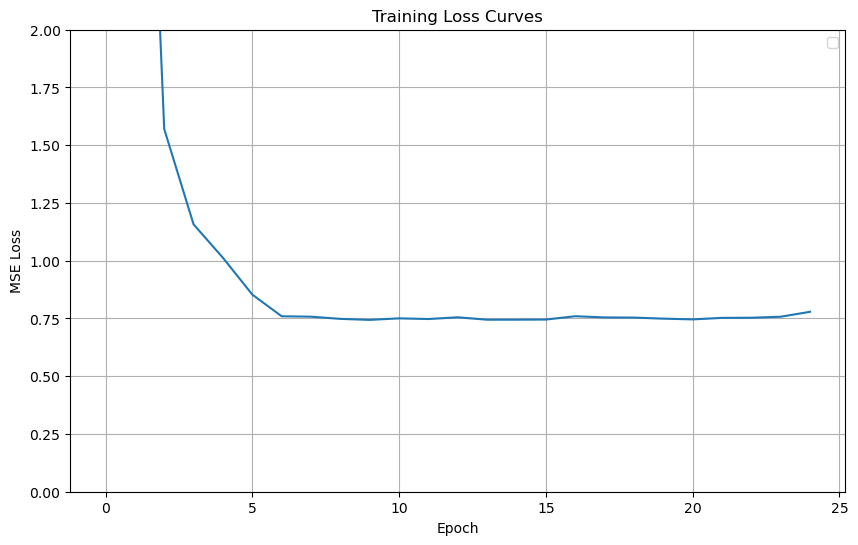

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses)
plt.title("Training Loss Curves")
plt.ylim(0,2)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


In [69]:
model.eval()
with torch.no_grad():
    output = model(torch.tensor(X_test,dtype=torch.float32))
    print(output)
    loss = criterion(output.squeeze(),torch.tensor(y_test,dtype=torch.float32))
    print(loss.item())
    

tensor([[-11.1852],
        [-11.1801],
        [-11.1874],
        [-11.1876],
        [-11.1693],
        [-11.1672],
        [-11.1824],
        [-11.1760],
        [-11.1735],
        [-11.1729],
        [-11.1907],
        [-11.1714],
        [-11.1859],
        [-11.1826],
        [-11.1832],
        [-11.1876],
        [-11.1790],
        [-11.1831],
        [-11.1869],
        [-11.1773],
        [-11.1822],
        [-11.1942],
        [-11.1767],
        [-11.1759],
        [-11.1783],
        [-11.1778],
        [-11.1800],
        [-11.1696],
        [-11.1798],
        [-11.1804],
        [-11.1856],
        [-11.1679],
        [-11.1738],
        [-11.1735],
        [-11.1857],
        [-11.1775],
        [-11.1810],
        [-11.1713],
        [-11.1859],
        [-11.1725],
        [-11.1757],
        [-11.1788],
        [-11.1811],
        [-11.1882],
        [-11.1741],
        [-11.1695],
        [-11.1901],
        [-11.1779],
        [-11.1839],
        [-11.1875],


# PCA

In [70]:
aa_array = np.array([[0.62, -0.5, 27.5, 8.1, 0.046, 1.181, 0.007187],
[0.29, -1, 44.6, 5.5, 0.128, 1.461, -0.03661],
[-0.9, 3, 40, 13, 0.105, 1.587, -0.02382],
[-0.74, 3, 62, 12.3, 0.151, 1.862, 0.006802],
[1.19, -2.5, 115.5, 5.2, 0.29, 2.228, 0.037552],
[0.48, 0, 0, 9, 0, 0.881, 0.179052],
[-0.4, -0.5, 79, 10.4, 0.23, 2.025, -0.01069],
[1.38, -1.8, 93.5, 5.2, 0.186, 1.81, 0.021631],
[-1.5, 3, 100, 11.3, 0.219, 2.258, 0.017708],
[1.06, -1.8, 93.5, 4.9, 0.186, 1.931, 0.051672],
[0.64, -1.3, 94.1, 5.7, 0.221, 2.034, 0.002683],
[-0.78, 2, 58.7, 11.6, 0.134, 1.655, 0.005392],
[0.12, 0, 41.9, 8, 0.131, 1.468, 0.239531],
[-0.85, 0.2, 80.7, 10.5, 0.18, 1.932, 0.049211],
[-2.53, 3, 105, 10.5, 0.291, 2.56, 0.043587],
[-0.18, 0.3, 29.3, 9.2, 0.062, 1.298, 0.004627],
[-0.05, -0.4, 51.3, 8.6, 0.108, 1.525, 0.003352],
[1.08, -1.5, 71.5, 5.9, 0.14, 1.645, 0.057004],
[0.81, -3.4, 145.5, 5.4, 0.409, 2.663, 0.037977],
[0.26, -2.3, 117.3, 6.2, 0.298, 2.368, 0.023599]])

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


# Standardize the aa_array
scaler = StandardScaler()
scaled_aa_array = scaler.fit_transform(aa_array)

# Apply PCA
pca = PCA(n_components=5)  # Specify the number of components
pca.fit(scaled_aa_array)

# Transform the aa_array
transformed_aa_array = pca.transform(scaled_aa_array)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Transformed aa_array:\n", transformed_aa_array)
print("Explained Variance Ratio:\n", explained_variance)

Transformed aa_array:
 [[-1.56557893  1.63466958 -1.0059481   0.00646581 -0.06530973]
 [-0.20431096  1.17638614 -1.44733076 -0.79658886 -0.208243  ]
 [-2.47745976 -1.47284978 -0.81882602  0.39418563  0.13883597]
 [-1.58561736 -1.69987594 -0.20181632  0.422796    0.44346171]
 [ 2.76477355  0.64486332  0.07831701  0.23305564  0.15859144]
 [-2.93053989  2.57202769  1.45993975  0.11388996 -0.1354459 ]
 [ 0.28121489 -1.03792866 -0.47522621  0.47783148 -0.56974633]
 [ 1.48030593  1.3839416  -0.48363455  0.07939265  0.47285754]
 [-0.40482998 -2.75724434  0.347672   -0.1132625   0.423694  ]
 [ 1.52247384  1.2605292   0.04946707 -0.18168097  0.38008149]
 [ 1.54079386  0.40609126 -0.51825783 -0.21232643  0.20957723]
 [-1.61132378 -1.14524664 -0.35143539  0.23864789  0.06768808]
 [-1.16961417  1.53920378  2.85946906 -0.06582792 -0.0065743 ]
 [-0.36816463 -1.0034479   0.43201807  0.16505039 -0.38639702]
 [ 0.13976075 -3.62749273  1.08771185 -0.83740033 -0.07510384]
 [-1.86555739  0.67176044 -0.817

If using PCA, all of the useful features of amino acids will not be kept, which we think is important for the model to learn. We decided to not use PCA